# Investigation of California Socioeconomic Relations Dataset

This contains the chapter on how we analysed the data and discusses a summary of our findings.

## Importing required libraries<a class="anchor" id="library-imports"></a>

In [1]:
# Standard python packages
import os
import sys
from pathlib import Path

# Other package imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data_folder = Path("../data/processed")

In [3]:
income_df = pd.read_csv(data_folder / "X19_INCOME.csv")

In [4]:
income_total = income_df["PER CAPITA INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS): Total: Total population -- (Estimate)"]

In [5]:
categories = ["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Bachelor's degree: Population 25 years and over -- (Estimate)", "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Master's degree: Population 25 years and over -- (Estimate)", "EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Doctorate degree: Population 25 years and over -- (Estimate)"]

edu_df = pd.read_csv(data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv")
edu_deg = edu_df[categories].sum(axis=1)
income_edu = pd.concat([income_total, edu_deg], axis=1)
income_edu.columns = ["Per captia income", "Bachelor's or higher"]

In [6]:
edu_total = edu_df["SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Estimate)"]
income_edu["Pop Norm"] = income_edu["Bachelor's or higher"].divide(edu_total, fill_value=0)
income_edu = income_edu.dropna()

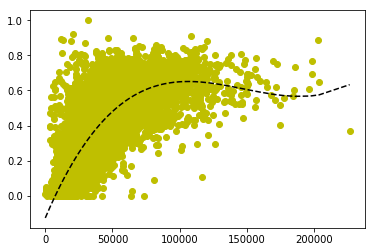

In [7]:
import scipy as sp
income_edu = income_edu.sort_values("Per captia income")
x = income_edu.iloc[:, 0]
y = income_edu.iloc[:, 2]

fit = np.polyfit(x,y,3)
fit_fn = np.poly1d(fit) 
plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.show()